In [1]:
import numpy as np
import pandas as pd

In [2]:
today_num = int(pd.Timestamp.today().date().strftime("%Y%m%d"))
offset = 0
print(f"our seed is {today_num + offset}")
np.random.seed(today_num + offset)
n = 5000
m = 2000
k = 20
our_dtype = 'float32'

V_orig = np.random.randn(n,m).astype(our_dtype)
V_orig = (V_orig - 0.5) * (V_orig > 0.5)
V_orig = V_orig / V_orig.sum().sum() * k

our seed is 20230717


In [3]:
V_orig[:5,:5]

array([[-0.0000000e+00, -0.0000000e+00, -0.0000000e+00,  2.7596393e-06,
        -0.0000000e+00],
       [ 1.2238571e-06, -0.0000000e+00, -0.0000000e+00, -0.0000000e+00,
         2.9259454e-06],
       [ 1.0804684e-05, -0.0000000e+00,  1.2128917e-05,  1.6838709e-05,
         5.7604421e-07],
       [-0.0000000e+00,  1.0661647e-05, -0.0000000e+00, -0.0000000e+00,
        -0.0000000e+00],
       [-0.0000000e+00,  1.3444862e-05,  1.0100872e-05, -0.0000000e+00,
        -0.0000000e+00]], dtype=float32)

In [4]:
def init_klnmf(V, k, seed = 1, eps = 1e-8):
    
    np.random.seed(seed)
    n,m = V.shape
    W = np.random.rand(n, k).astype(our_dtype)
    H = np.random.rand(k, m).astype(our_dtype)
    A = V / (W @ H)    
    H = H * (W.T @ A) / W.sum(axis = 0, keepdims = True).T
    A = V / (W @ H)    
    W = W * (A @ H.T) / H.sum(axis = 1, keepdims = True).T
    
    H = H / H.sum(axis = 1, keepdims = True)
    W = W / W.sum(axis = 0, keepdims = True)
    return W, H, A

In [5]:
W_mat, H_mat, A_mat = init_klnmf(V_orig, k)

In [6]:
def run_mu(V, k, seed = 1, num_iter = 1000, num_print = 50, eps = 1e-8):
    
    W, H, A = init_klnmf(V, k, seed = seed, eps = eps)
    
    np.random.seed(seed * 2023)
    
    obj_func = np.zeros(num_iter)
    obj_intercept = k * np.log(k) - k + 1
    
    for i in range(num_iter):
        if i > 0:
            #
            #A = V / (W @ H)
            H = H * (W.T @ A) / W.sum(axis = 0, keepdims = True).T
            #
            A = V / (W @ H)
            W = W * (A @ H.T) / H.sum(axis = 1, keepdims = True).T
            #
            A = V / (W @ H)
        else:
            A = V / (W @ H)
        obj_func[i] = obj_intercept + (V * np.log(A + eps)).sum().sum()
        if i == 0:
            print(f"init: obj {obj_func[i]}")
        elif i % num_print == num_print-1:
            print(f"round {i+1}: obj {obj_func[i]}")
    return W, H, A, obj_func

In [7]:
def run_mu_with_normalize(V, k, seed = 1, num_iter = 1000, num_print = 50, eps = 1e-8):
    
    W, H, A = init_klnmf(V, k, seed = seed, eps = eps)
    
    np.random.seed(seed * 2023)
    
    obj_func = np.zeros(num_iter)
    obj_intercept = k * np.log(k) - k + 1
    
    for i in range(num_iter):
        if i > 0:
            #
            #A = V / (W @ H)
            H = H * (W.T @ A) / W.sum(axis = 0, keepdims = True).T
            H = H / H.sum(axis = 1, keepdims = True)
            #
            A = V / (W @ H)
            W = W * (A @ H.T) / H.sum(axis = 1, keepdims = True).T
            W = W / W.sum(axis = 0, keepdims = True)
            #
            A = V / (W @ H)
        else:
            A = V / (W @ H)
        obj_func[i] = obj_intercept + (V * np.log(A + eps)).sum().sum()
        if i == 0:
            print(f"init: obj {obj_func[i]}")
        elif i % num_print == num_print-1:
            print(f"round {i+1}: obj {obj_func[i]}")
    return W, H, A, obj_func

In [8]:
res_mu = run_mu(V_orig, k)

init: obj 70.73531845997141
round 50: obj 70.12255600879953
round 100: obj 69.9698555846052
round 150: obj 69.91558007190989
round 200: obj 69.88779190967844
round 250: obj 69.87064103077219
round 300: obj 69.85901955555246
round 350: obj 69.85056618641184
round 400: obj 69.84407357166575
round 450: obj 69.83895234058664
round 500: obj 69.83483056019114
round 550: obj 69.83138398121164
round 600: obj 69.8284981627302
round 650: obj 69.8259461302595
round 700: obj 69.82372406910227
round 750: obj 69.82176331470774
round 800: obj 69.82004097889231
round 850: obj 69.8184883971052
round 900: obj 69.81707505176828
round 950: obj 69.81577614734934
round 1000: obj 69.81457451771067


In [9]:
res_mu_with_normalize = run_mu_with_normalize(V_orig, k)

init: obj 70.73531845997141
round 50: obj 70.12258461902903
round 100: obj 69.96988228748606
round 150: obj 69.91561440418528
round 200: obj 69.88775185535715
round 250: obj 69.87064293812082
round 300: obj 69.85900238941477
round 350: obj 69.85056618641184
round 400: obj 69.84409073780344
round 450: obj 69.8390133757429
round 500: obj 69.83488015125559
round 550: obj 69.83145455311106
round 600: obj 69.82856301258371
round 650: obj 69.82603005359934
round 700: obj 69.82377366016672
round 750: obj 69.82181862781809
round 800: obj 69.8200695891218
round 850: obj 69.81855706165598
round 900: obj 69.81712845753
round 950: obj 69.81583336780832
round 1000: obj 69.81464508961008


In [10]:
def run_scipi(V, k, seed = 1, num_iter = 1000, num_print = 50, eps = 1e-8):
    
    W, H, A = init_klnmf(V, k, seed = seed, eps = eps)
    
    np.random.seed(seed * 2023)
    
    obj_func = np.zeros(num_iter)
    obj_intercept = k * np.log(k) - k + 1
    
    for i in range(num_iter):
        if i > 0:
            #
            # A = V / (W @ H)
            H = H * np.square(W.T @ A)
            H = H / H.sum(axis = 1, keepdims = True)
            #
            A = V / (W @ H)
            W = W * np.square(A @ H.T)
            W = W / W.sum(axis = 0, keepdims = True)
            #
            A = V / (W @ H)
        else:
            A = V / (W @ H)
        obj_func[i] = obj_intercept + (V * np.log(A + eps)).sum().sum()
        if i == 0:
            print(f"init: obj {obj_func[i]}")
        elif i % num_print == num_print-1:
            print(f"round {i+1}: obj {obj_func[i]}")
    return W, H, A, obj_func

In [11]:
res_scipi = run_scipi(V_orig, k)

init: obj 70.73531845997141
round 50: obj 69.96830300281809
round 100: obj 69.8861039061384
round 150: obj 69.85762337635325
round 200: obj 69.84296349476145
round 250: obj 69.83391884754465
round 300: obj 69.82768944690989
round 350: obj 69.82300309131907
round 400: obj 69.81940583179758
round 450: obj 69.81649521778391
round 500: obj 69.81402329395578
round 550: obj 69.81201485584543
round 600: obj 69.81025628040598
round 650: obj 69.80879143665598
round 700: obj 69.807513513072
round 750: obj 69.80635765980051
round 800: obj 69.80535630176828
round 850: obj 69.80445412586496
round 900: obj 69.8035729307966
round 950: obj 69.80282906482981
round 1000: obj 69.80214623401926


In [12]:
def run_pgd(V, k, seed = 1, num_iter = 1000, stepsize = 1.0, num_print = 50, eps = 1e-8):
    
    W, H, A = init_klnmf(V, k, seed = seed, eps = eps)
    
    np.random.seed(seed * 2023)
    
    obj_func = np.zeros(num_iter)
    obj_intercept = k * np.log(k) - k + 1
    
    for i in range(num_iter):
        if i > 0:
            #
            # A = V / (W @ H)
            H = H + (W.T @ A - W.sum(axis = 0, keepdims = True).T) * H / W.sum(axis = 0, keepdims = True).T * stepsize
            H = np.maximum(H, 0.0)
            #
            A = V / (W @ H)
            W = W + (A @ H.T - H.sum(axis = 1, keepdims = True).T) * W / H.sum(axis = 1, keepdims = True).T * stepsize
            W = np.maximum(W, 0.0)
            #
            A = V / (W @ H)
        else:
            A = V / (W @ H)
        obj_func[i] = obj_intercept + (V * np.log(A + eps)).sum().sum()
        if i == 0:
            print(f"init: obj {obj_func[i]}")
        elif i % num_print == num_print-1:
            print(f"round {i+1}: obj {obj_func[i]}")
    return W, H, A, obj_func

In [13]:
res_pgd = run_pgd(V_orig, k, stepsize = 1.5)

init: obj 70.73531845997141
round 50: obj 70.02225617359446
round 100: obj 69.91479996631907
round 150: obj 69.87762574146555
round 200: obj 69.8584225554304
round 250: obj 69.84662369678782
round 300: obj 69.83856514881418
round 350: obj 69.83273629139231
round 400: obj 69.82821015308664
round 450: obj 69.82452897022532
round 500: obj 69.82151917408274
round 550: obj 69.81903389881418
round 600: obj 69.81689194629953
round 650: obj 69.81496361683176
round 700: obj 69.81332329700754
round 750: obj 69.8118851561384
round 800: obj 69.81059769581125
round 850: obj 69.80942086170481
round 900: obj 69.80839280079172
round 950: obj 69.8074734587507
round 1000: obj 69.80662850330637


In [14]:
res_pgd2 = run_pgd(V_orig, k, stepsize = 0.5)

init: obj 70.73531845997141
round 50: obj 70.34890679310129
round 100: obj 70.12179688404368
round 150: obj 70.02300957630442
round 200: obj 69.9705708403425
round 250: obj 69.93824700306223
round 300: obj 69.91638688038157
round 350: obj 69.90055207203196
round 400: obj 69.88849190662668
round 450: obj 69.87898758838938
round 500: obj 69.87130288074778
round 550: obj 69.86494568775461
round 600: obj 69.85959176014231
round 650: obj 69.85501603077219
round 700: obj 69.85105446766184
round 750: obj 69.84759453724192
round 800: obj 69.84451226185129
round 850: obj 69.84181717823313
round 900: obj 69.83938912342356
round 950: obj 69.83715752552317
round 1000: obj 69.83519867847727


In [15]:
def check_sufficient_decrease(obj, obj_new, grad, grad_proj, alpha = 1.0):
    return obj_new - obj - alpha * (grad * grad_proj).sum()

In [16]:
def run_pgd_with_linesearch(V, k, seed = 1, num_iter = 1000, init_stepsize = 1.0, num_linesearch = 10, alpha = 1.0, num_print = 50, eps = 1e-8):
    
    W, H, A = init_klnmf(V, k, seed = seed, eps = eps)
    
    np.random.seed(seed * 2023)
    
    obj_func = np.zeros(num_iter)
    obj_intercept = k * np.log(k) - k + 1
    
    for i in range(num_iter):
        if i > 0:
            #
            obj = obj_func[i-1]
            G = -(W.T @ A - W.sum(axis = 0, keepdims = True).T) * H / W.sum(axis = 0, keepdims = True).T
            stepsize = init_stepsize
            for j in range(num_linesearch):
                H_temp = H - G * stepsize
                H_temp = np.maximum(H_temp, 0.0)
                G_proj = H_temp - H
                A_temp = V / (W @ H_temp)
                obj_temp = obj_intercept + (V * np.log(A_temp + eps)).sum().sum()
                if check_sufficient_decrease(obj, obj_temp, G, G_proj, alpha) < 0.0:
                    break
                else:
                    stepsize = stepsize * 0.5
            #print(i, stepsize)
            H = H - G * stepsize
            H = np.maximum(H, 0.0)
            A = V / (W @ H)
            obj = obj_intercept + (V * np.log(A + eps)).sum().sum()
            #
            G = -(A @ H.T - H.sum(axis = 1, keepdims = True).T) * W / H.sum(axis = 1, keepdims = True).T
            W = W - G * stepsize
            stepsize = init_stepsize
            for j in range(num_linesearch):
                W_temp = W - G * stepsize
                W_temp = np.maximum(W_temp, 0.0)
                G_proj = W_temp - W
                A_temp = V / (W_temp @ H)
                obj_temp = obj_intercept + (V * np.log(A_temp + eps)).sum().sum()
                if check_sufficient_decrease(obj, obj_temp, G, G_proj, alpha) < 0.0:
                    break
                else:
                    stepsize = stepsize * 0.5
            #print(i, stepsize)
            W = W - G * stepsize
            W = np.maximum(W, 0.0)
            #
            A = V / (W @ H)
        else:
            A = V / (W @ H)
        obj_func[i] = obj_intercept + (V * np.log(A + eps)).sum().sum()
        if i == 0:
            print(f"init: obj {obj_func[i]}")
        elif i % num_print == num_print-1:
            print(f"round {i+1}: obj {obj_func[i]}")
    return W, H, A, obj_func

In [17]:
res_pgd_with_linesearch = run_pgd_with_linesearch(V_orig, k)

init: obj 70.73531845997141
round 50: obj 70.04027489612864
round 100: obj 69.92857483814524
round 150: obj 69.88798455189036
round 200: obj 69.86678627918528
round 250: obj 69.85366944263743
round 300: obj 69.84457901905344
round 350: obj 69.83793000171946
round 400: obj 69.8328640837507
round 450: obj 69.82885483692453
round 500: obj 69.82567528675364
round 550: obj 69.82286957691477
round 600: obj 69.82061127613352
round 650: obj 69.81868866871164
round 700: obj 69.81705407093332
round 750: obj 69.815570153697
round 800: obj 69.81439331959055
round 850: obj 69.81331757496164
round 900: obj 69.81220559070871
round 950: obj 69.81176690052317
round 1000: obj 69.81088189075754


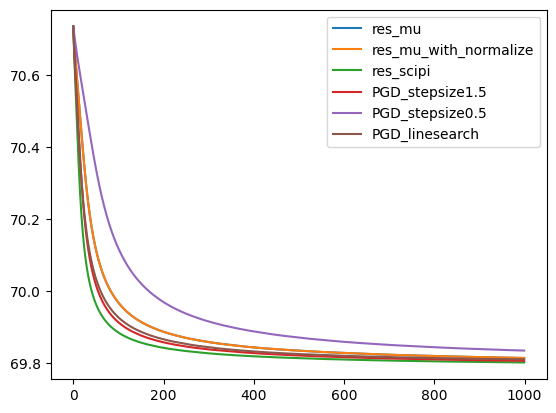

In [18]:
import matplotlib.pyplot as plt
plt.plot(res_mu[3])
plt.plot(res_mu_with_normalize[3])
plt.plot(res_scipi[3])
plt.plot(res_pgd[3])
plt.plot(res_pgd2[3])
plt.plot(res_pgd_with_linesearch[3])
plt.legend(["res_mu", "res_mu_with_normalize", "res_scipi", "PGD_stepsize1.5", "PGD_stepsize0.5", "PGD_linesearch"])